In [2]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
df1 = pd.read_csv("table_1.csv")
df2 = pd.read_csv("table_2.csv")
df3 = pd.read_csv("table_3.csv")
df4 = pd.read_csv("table_4.csv")         

In [80]:
df1.head()

,day_no,visitors,day_week
0,1,563,Wed
1,2,555,Thur
2,3,390,Fri
3,4,296,Sat
4,5,387,Sun


In [81]:
df2.head()

,day_no,visitors
0,1,1747
1,2,1785
2,3,1697
3,4,1771
4,5,1814


In [82]:
df3.head()

,week_no,visitors
0,21,1654
1,22,1734
2,23,1694
3,24,1230


In [83]:
df4.head()

,week_no,visitors
0,21,1654
1,22,1945
2,23,1743
3,24,1534
4,25,1634


# Considering table 1

In [84]:
#B1 = df1.groupby(["day_week"]).sum()
B1= df1

In [85]:
r_1 = np.mean(B1['visitors'])
range_r_1 = max(B1['visitors']) - min(B1['visitors'])
ucl_r_1 = 1.5*r_1
lcl_r_1 = 0*B1['visitors']

In [86]:
B1

,day_no,visitors,day_week
0,1,563,Wed
1,2,555,Thur
2,3,390,Fri
3,4,296,Sat
4,5,387,Sun
5,6,603,Mon
6,7,612,Tue
7,8,614,Wed
8,9,584,Thur
9,10,446,Fri


In [87]:
B1.insert(2,'rbar',r_1)
B1.insert(3,'ucl_r',ucl_r_1)
B1.insert(4,'lcl_r',lcl_r_1)

In [88]:
B1


,day_no,visitors,rbar,ucl_r,lcl_r,day_week
0,1,563,515.516129,773.274194,0,Wed
1,2,555,515.516129,773.274194,0,Thur
2,3,390,515.516129,773.274194,0,Fri
3,4,296,515.516129,773.274194,0,Sat
4,5,387,515.516129,773.274194,0,Sun
5,6,603,515.516129,773.274194,0,Mon
6,7,612,515.516129,773.274194,0,Tue
7,8,614,515.516129,773.274194,0,Wed
8,9,584,515.516129,773.274194,0,Thur
9,10,446,515.516129,773.274194,0,Fri


<AxesSubplot:>

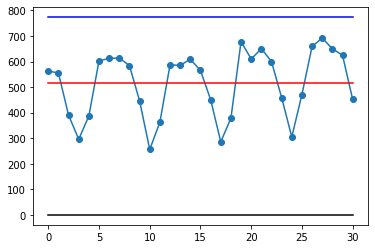

In [89]:
B1["visitors"].plot(marker="o")
B1["ucl_r"].plot(color='b')
B1["lcl_r"].plot(color='k')
B1["rbar"].plot(color='r')


In [90]:
count = 0
for i in B1["visitors"]:
    if i>ucl_r_1:
        count =count+1
B1 = B1.drop(B1[B1.visitors > ucl_r_1].index)

In [91]:
count

0

## for iteration 1 without grouping:
    * center line = 515.5
    * uper control limit = 773.3
    * lower control limit = 0
    * out of range visitors = 0

In [92]:
# Grouping by week:

In [93]:
## Iteration 1

In [95]:
del B1["rbar"]
del B1["ucl_r"]
del B1["lcl_r"]

In [96]:
B = df1.groupby(["day_week"]).sum()

In [102]:
B

,day_no,visitors,Rbar,rbar,ucl_r,lcl_r
day_week,,,,,,
Fri,85,2198,2283.0,2577.580645,3866.370968,0
Mon,66,2527,2283.0,2062.064516,3093.096774,0
Sat,58,1143,2283.0,2062.064516,3093.096774,0
Sun,62,1599,2283.0,2062.064516,3093.096774,0
Thur,80,2929,2283.0,2577.580645,3866.370968,0
Tue,70,2499,2283.0,2062.064516,3093.096774,0
Wed,75,3086,2283.0,2577.580645,3866.370968,0


In [100]:
Rbar_g = np.mean(B["visitors"])
ucl_r_g = 1.6 * Rbar
lcl_r_g = 0* Rbar

In [103]:
B.insert(2,'Rbar_g',Rbar_g)
B.insert(3,'ucl_r_g',ucl_r_g)
B.insert(4,'lcl_r_g',lcl_r_g)
B

,day_no,visitors,Rbar_g,ucl_r_g,lcl_r_g,Rbar,rbar,ucl_r,lcl_r
day_week,,,,,,,,,
Fri,85,2198,2283.0,3652.8,0.0,2283.0,2577.580645,3866.370968,0
Mon,66,2527,2283.0,3652.8,0.0,2283.0,2062.064516,3093.096774,0
Sat,58,1143,2283.0,3652.8,0.0,2283.0,2062.064516,3093.096774,0
Sun,62,1599,2283.0,3652.8,0.0,2283.0,2062.064516,3093.096774,0
Thur,80,2929,2283.0,3652.8,0.0,2283.0,2577.580645,3866.370968,0
Tue,70,2499,2283.0,3652.8,0.0,2283.0,2062.064516,3093.096774,0
Wed,75,3086,2283.0,3652.8,0.0,2283.0,2577.580645,3866.370968,0


<AxesSubplot:xlabel='day_week'>

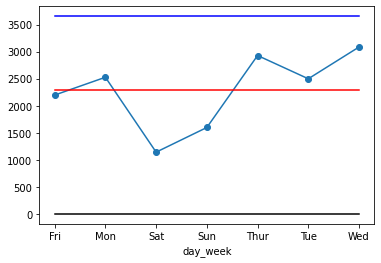

In [105]:
B["visitors"].plot(marker="o")
B["ucl_r_g"].plot(color='b')
B["lcl_r_g"].plot(color='k')
B["Rbar_g"].plot(color='r')


In [106]:
count = 0
for i in B1["visitors"]:
    if i>ucl_r_g:
        count =count+1
B1 = B1.drop(B1[B1.visitors > ucl_r_g].index)

In [107]:
count

0

## for iteration 1 with grouping:
    * center line = 2283
    * uper control limit = 3652.8
    * lower control limit = 0
    * out of range visitors = 0

## Standard deviation

In [114]:
std = np.std(B["visitors"])
B1["standard_deviation"] = abs(std - B1["visitors"])

In [115]:
B1

,day_no,visitors,day_week,standard_deviation
0,1,563,Wed,85.404415
1,2,555,Thur,93.404415
2,3,390,Fri,258.404415
3,4,296,Sat,352.404415
4,5,387,Sun,261.404415
5,6,603,Mon,45.404415
6,7,612,Tue,36.404415
7,8,614,Wed,34.404415
8,9,584,Thur,64.404415
9,10,446,Fri,202.404415


# Considering Table 2

In [116]:
B2 = df2

In [117]:
r_2 = np.mean(B2['visitors'])
range_r_2 = max(B2['visitors']) - min(B2['visitors'])
ucl_r_2 = 1.5*r_2
lcl_r_2 = 0*B2['visitors']

In [118]:
B2.insert(2,'rbar',r_2)
B2.insert(3,'ucl_r',ucl_r_2)
B2.insert(4,'lcl_r',lcl_r_2)

In [119]:
B2

,day_no,visitors,rbar,ucl_r,lcl_r
0,1,1747,1722.8,2584.2,0
1,2,1785,1722.8,2584.2,0
2,3,1697,1722.8,2584.2,0
3,4,1771,1722.8,2584.2,0
4,5,1814,1722.8,2584.2,0
5,6,1685,1722.8,2584.2,0
6,7,1645,1722.8,2584.2,0
7,8,1555,1722.8,2584.2,0
8,9,1807,1722.8,2584.2,0
9,10,1840,1722.8,2584.2,0


<AxesSubplot:>

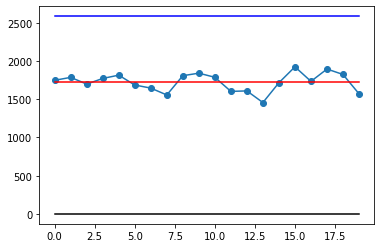

In [121]:
B2["visitors"].plot(marker="o")
B2["ucl_r"].plot(color='b')
B2["lcl_r"].plot(color='k')
B2["rbar"].plot(color='r')

In [122]:
count = 0
for i in B2["visitors"]:
    if i>ucl_r_2:
        count =count+1
B2 = B2.drop(B2[B2.visitors > ucl_r_2].index)

In [123]:
count

0

## for table2:
    * center line = 1722.8
    * uper control limit = 2584.2
    * lower control limit = 0
    * out of range visitors = 0

## Standard deviation

In [125]:
std = np.std(B2["visitors"])
B2["standard_deviation"] = abs(std - B2["visitors"])

In [126]:
B2

,day_no,visitors,rbar,ucl_r,lcl_r,standard_deviation
0,1,1747,1722.8,2584.2,0,1629.077313
1,2,1785,1722.8,2584.2,0,1667.077313
2,3,1697,1722.8,2584.2,0,1579.077313
3,4,1771,1722.8,2584.2,0,1653.077313
4,5,1814,1722.8,2584.2,0,1696.077313
5,6,1685,1722.8,2584.2,0,1567.077313
6,7,1645,1722.8,2584.2,0,1527.077313
7,8,1555,1722.8,2584.2,0,1437.077313
8,9,1807,1722.8,2584.2,0,1689.077313
9,10,1840,1722.8,2584.2,0,1722.077313


# Considering Table 3

In [133]:
B3 = df3
r_3 = np.mean(B3['visitors'])
range_r_3 = max(B3['visitors']) - min(B3['visitors'])
ucl_r_3 = 1.4*r_3
lcl_r_3 = 0*B3['visitors']

In [134]:
B3.insert(2,'rbar',r_3)
B3.insert(3,'ucl_r',ucl_r_3)
B3.insert(4,'lcl_r',lcl_r_3)
B3

,week_no,visitors,rbar,ucl_r,lcl_r
0,21,1654,1578.0,2209.2,0
1,22,1734,1578.0,2209.2,0
2,23,1694,1578.0,2209.2,0
3,24,1230,1578.0,2209.2,0


<AxesSubplot:>

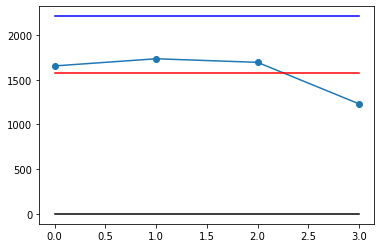

In [135]:
B3["visitors"].plot(marker="o")
B3["ucl_r"].plot(color='b')
B3["lcl_r"].plot(color='k')
B3["rbar"].plot(color='r')

In [136]:
count = 0
for i in B3["visitors"]:
    if i>ucl_r_3:
        count =count+1
B3 = B3.drop(B3[B3.visitors > ucl_r_3].index)

In [137]:
count

0

## for table3:
    * center line = 1578
    * uper control limit = 2209.2
    * lower control limit = 0
    * out of range visitors = 0

## Standard Deviation

In [148]:
std = np.std(B3["visitors"])
B3["standard_deviation"] = abs(std - B3["visitors"])
B3

,week_no,visitors,rbar,ucl_r,lcl_r,standard_deviation
0,21,1654,1578.0,2209.2,0,1451.10101
1,22,1734,1578.0,2209.2,0,1531.10101
2,23,1694,1578.0,2209.2,0,1491.10101
3,24,1230,1578.0,2209.2,0,1027.10101


# Considering Table 4

In [142]:
B4 = df4
r_4 = np.mean(B4['visitors'])
range_r_4 = max(B4['visitors']) - min(B4['visitors'])
ucl_r_4 = 1.4*r_4
lcl_r_4 = 0*B4['visitors']

In [143]:
B4.insert(2,'rbar',r_4)
B4.insert(3,'ucl_r',ucl_r_4)
B4.insert(4,'lcl_r',lcl_r_4)
B4

,week_no,visitors,rbar,ucl_r,lcl_r
0,21,1654,1702.0,2382.8,0
1,22,1945,1702.0,2382.8,0
2,23,1743,1702.0,2382.8,0
3,24,1534,1702.0,2382.8,0
4,25,1634,1702.0,2382.8,0


<AxesSubplot:>

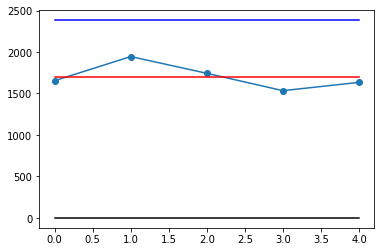

In [144]:
B4["visitors"].plot(marker="o")
B4["ucl_r"].plot(color='b')
B4["lcl_r"].plot(color='k')
B4["rbar"].plot(color='r')

In [145]:
count = 0
for i in B4["visitors"]:
    if i>ucl_r_4:
        count =count+1
B4 = B4.drop(B4[B4.visitors > ucl_r_4].index)

In [146]:
count

0

## for table4:
    * center line = 1702
    * uper control limit = 2382.8
    * lower control limit = 0
    * out of range visitors = 0

## Standard Deviation

In [147]:
std = np.std(B4["visitors"])
B4["standard_deviation"] = abs(std - B4["visitors"])
B4

,week_no,visitors,rbar,ucl_r,lcl_r,standard_deviation
0,21,1654,1702.0,2382.8,0,1515.521121
1,22,1945,1702.0,2382.8,0,1806.521121
2,23,1743,1702.0,2382.8,0,1604.521121
3,24,1534,1702.0,2382.8,0,1395.521121
4,25,1634,1702.0,2382.8,0,1495.521121
